1. Supervised - Regression and Classification
2. Unsupervised

Regression - Dependent variable will be continuous value - bell curve
Classification - Dependent variable will be discrete or binary
A
B

Load Library

In [1]:
import pandas as pd
import numpy as ns

Load dataset

In [2]:
train_data = 'train.csv'
test_data = 'test.csv'

data frame

In [3]:
train = pd.read_csv(train_data)
test = pd.read_csv(test_data)

Data Info

In [4]:
print(f'train data : {train.shape}\ntest data : {test.shape}')

train data : (891, 12)
test data : (418, 11)


In [5]:
print('train data')
train.head(2)

train data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [7]:
train['data']= 'train'
test['data'] = 'test'

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  data         891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  data         418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


Find Null

In [10]:
train_null=train.isnull().sum()
train_null[train_null>0].sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
dtype: int64

In [11]:
test_null = test.isnull().sum()
test_null[test_null>0].sort_values(ascending=False)

Cabin    327
Age       86
Fare       1
dtype: int64

Concat both dataset

In [12]:
all_data = pd.concat([train , test] , axis=0)
all_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train


Find info

In [13]:
all_data.shape

(1309, 13)

In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  data         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [15]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


Pre - Processing

Find Null

In [16]:
all_data.isnull().sum() / len(all_data)*100 

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
data            0.000000
dtype: float64

In [17]:
# Cabin data has 77% missing - so we have to drop this column
all_data = all_data.drop(['Cabin'], axis=1)

In [18]:
all_data.isnull().sum() / len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Embarked        0.152788
data            0.000000
dtype: float64

In [19]:
all_data.shape

(1309, 12)

In [20]:
all_data['Age'].describe().T

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
all_data['Age'].dtype

dtype('float64')

In [23]:
all_data['Age'].mean()

np.float64(29.881137667304014)

In [24]:
all_data['Age'].median()

np.float64(28.0)

In [25]:
# fill null value
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())

In [26]:
all_data.isnull().sum()/len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Embarked        0.152788
data            0.000000
dtype: float64

In [27]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'data'],
      dtype='object')

certain variables are non-significant and hence we have to drop them
PassengerID, Name, Ticket, Fare

In [28]:
all_data = all_data.drop(['PassengerId','Name','Ticket','Fare'], axis=1)

In [29]:
def basic_info(data):
    print("📌 Data Info:")
    data.info()
    
    print("\n📌 Shape:")
    print(data.shape)
    
    print("\n📌 Null Values (%):")
    print(data.isnull().sum() / len(data) * 100)


In [30]:
basic_info(all_data)

📌 Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1307 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB

📌 Shape:
(1309, 8)

📌 Null Values (%):
Survived    31.932773
Pclass       0.000000
Sex          0.000000
Age          0.000000
SibSp        0.000000
Parch        0.000000
Embarked     0.152788
data         0.000000
dtype: float64


In [31]:
all_data['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [32]:
all_data['Embarked'] = all_data['Embarked'].fillna('S')

In [33]:
all_data['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [34]:
train['Survived'].isnull().sum()

np.int64(0)

Encoding

In [35]:
all_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,data
0,0.0,3,male,22.0,1,0,S,train
1,1.0,1,female,38.0,1,0,C,train


In [36]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1309 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [37]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
one = OneHotEncoder()
lable = LabelEncoder()

In [38]:
# convert obj to int
all_data = pd.get_dummies(all_data, columns=['Pclass', 'Embarked', 'Sex'], dtype=int)

In [39]:
all_data.head(2)

,Survived,Age,SibSp,Parch,data,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0.0,22.0,1,0,train,0,0,1,0,0,1,0,1
1,1.0,38.0,1,0,train,1,0,0,1,0,0,1,0


In [40]:
# Remove unwanted rows
all_data = all_data.drop(['Pclass_1','Sex_female','Embarked_C'], axis=1)

In [41]:
all_data.head()

,Survived,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0.0,22.0,1,0,train,0,1,0,1,1
1,1.0,38.0,1,0,train,0,0,0,0,0
2,1.0,26.0,0,0,train,0,1,0,1,0
3,1.0,35.0,1,0,train,0,0,0,1,0
4,0.0,35.0,0,0,train,0,1,0,1,1


In [42]:
basic_info(all_data)

📌 Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Age         1309 non-null   float64
 2   SibSp       1309 non-null   int64  
 3   Parch       1309 non-null   int64  
 4   data        1309 non-null   object 
 5   Pclass_2    1309 non-null   int64  
 6   Pclass_3    1309 non-null   int64  
 7   Embarked_Q  1309 non-null   int64  
 8   Embarked_S  1309 non-null   int64  
 9   Sex_male    1309 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 112.5+ KB

📌 Shape:
(1309, 10)

📌 Null Values (%):
Survived      31.932773
Age            0.000000
SibSp          0.000000
Parch          0.000000
data           0.000000
Pclass_2       0.000000
Pclass_3       0.000000
Embarked_Q     0.000000
Embarked_S     0.000000
Sex_male       0.000000
dtype: float64


In [43]:
all_data['Parch'].value_counts()

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

<Axes: ylabel='SibSp'>

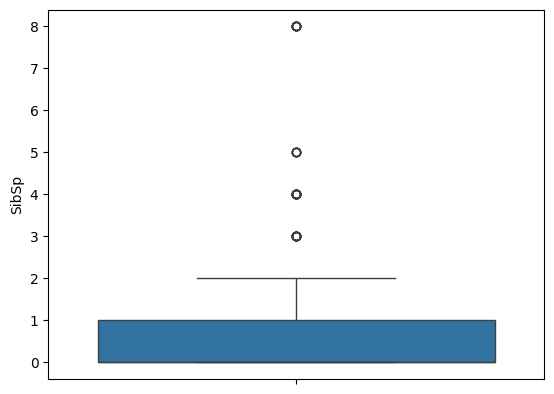

In [44]:
sns.boxplot(y='SibSp', data=all_data)

In [45]:
print(f'Train : {train.duplicated().sum()} \nTest : {test.duplicated().sum()} \nall_data : {all_data.duplicated().sum()}')

Train : 0 
Test : 0 
all_data : 439


In [46]:
# Segregate train and test 
train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

In [47]:
train.shape

(891, 10)

In [48]:
test.shape

(418, 10)

In [49]:
train = train.drop(['data'], axis=1)
test = test.drop(['data'], axis=1)

In [50]:
train.head(3)

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0.0,22.0,1,0,0,1,0,1,1
1,1.0,38.0,1,0,0,0,0,0,0
2,1.0,26.0,0,0,0,1,0,1,0


Split data into train and test

In [51]:
x = train.drop(['Survived'] , axis=1)
y = train['Survived']

In [52]:
x.head(3)

,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,22.0,1,0,0,1,0,1,1
1,38.0,1,0,0,0,0,0,0
2,26.0,0,0,0,1,0,1,0


In [53]:
y.head(3)

0    0.0
1    1.0
2    1.0
Name: Survived, dtype: float64

In [54]:
x1 = test.drop(['Survived'], axis=1)
y1 = test['Survived']

In [55]:
x1.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,34.5,0,0,0,1,1,0,1
1,47.0,1,0,0,1,0,1,0
2,62.0,0,0,1,0,1,0,1
3,27.0,0,0,0,1,0,1,1
4,22.0,1,1,0,1,0,1,0


In [56]:
y1.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Survived, dtype: float64

# Exploratory Data Analysis - EDA

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17216\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


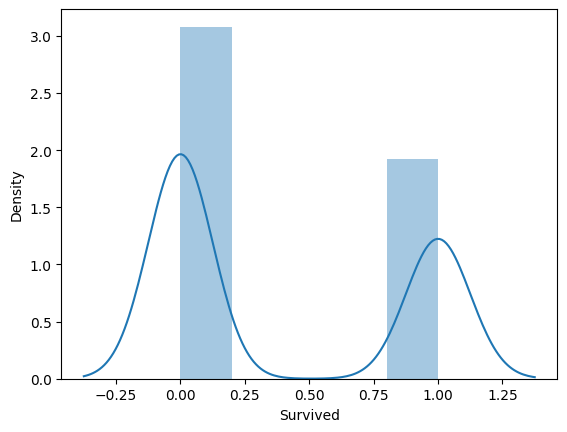

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17216\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


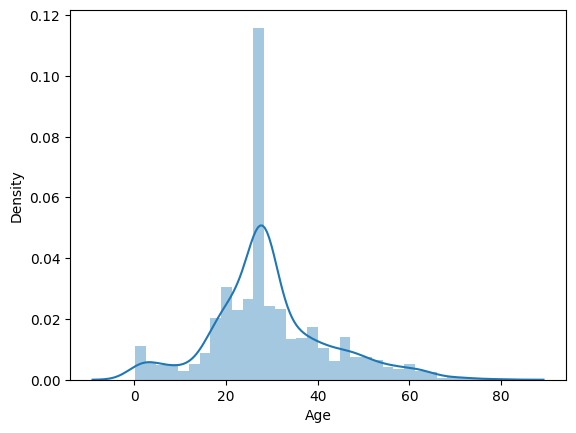

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17216\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


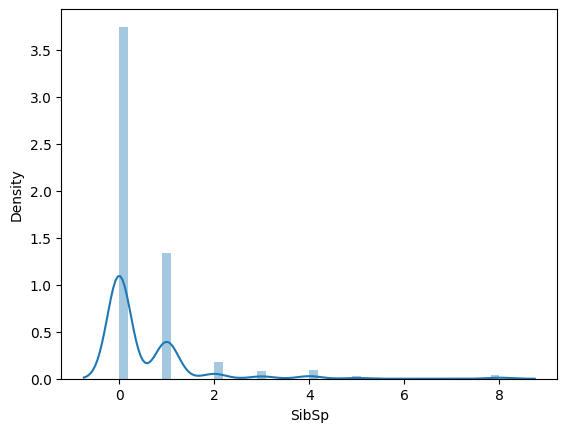

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17216\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


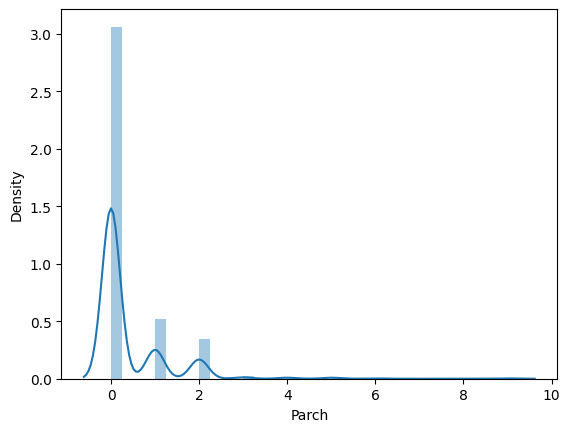

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17216\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


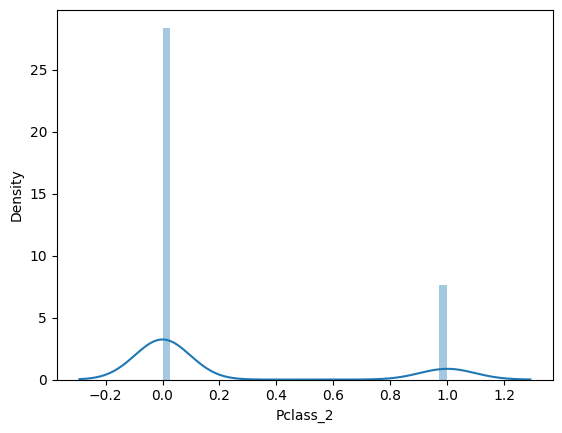

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17216\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


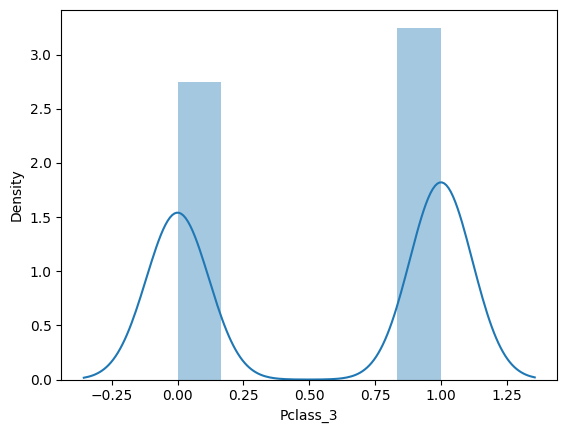

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17216\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


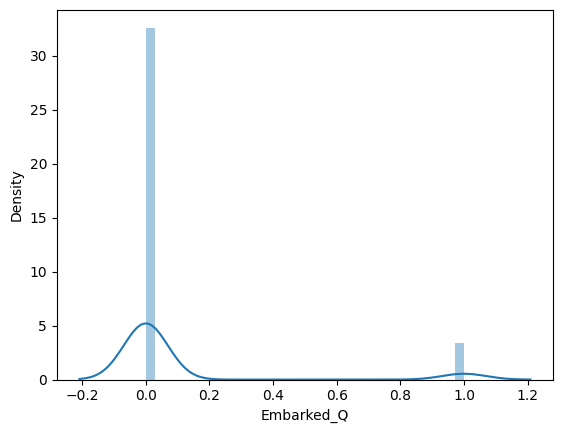

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17216\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


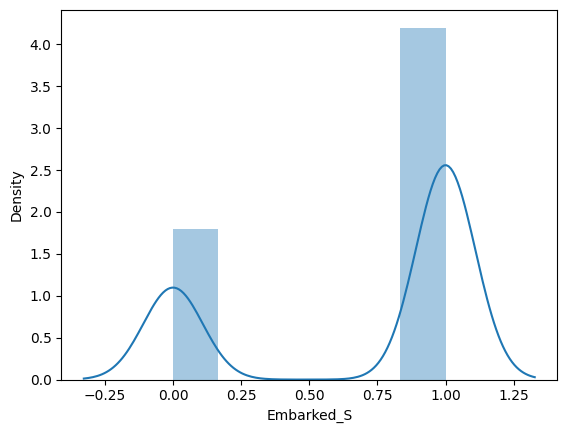

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17216\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


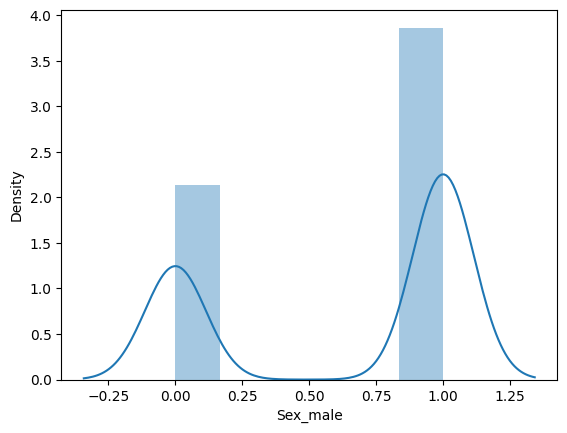

In [57]:
def distplots(col):
    sns.distplot(all_data[col])
    plt.show()
    
for i in list(all_data.select_dtypes(exclude=['object']).columns):
    distplots(i)

<Axes: >

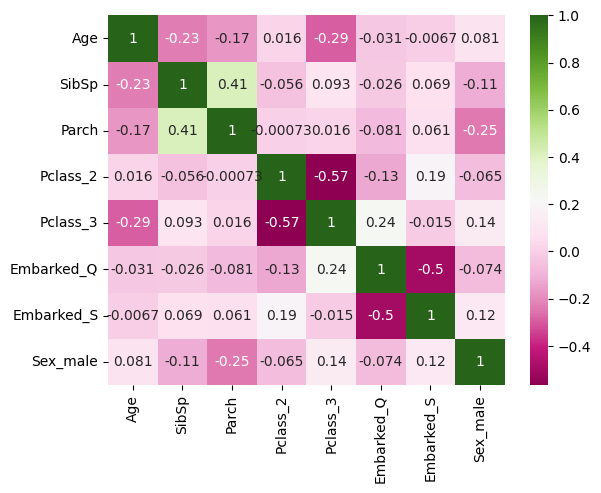

In [ ]:
sns.heatmap(x.corr(), annot=True, cmap='PiYG')

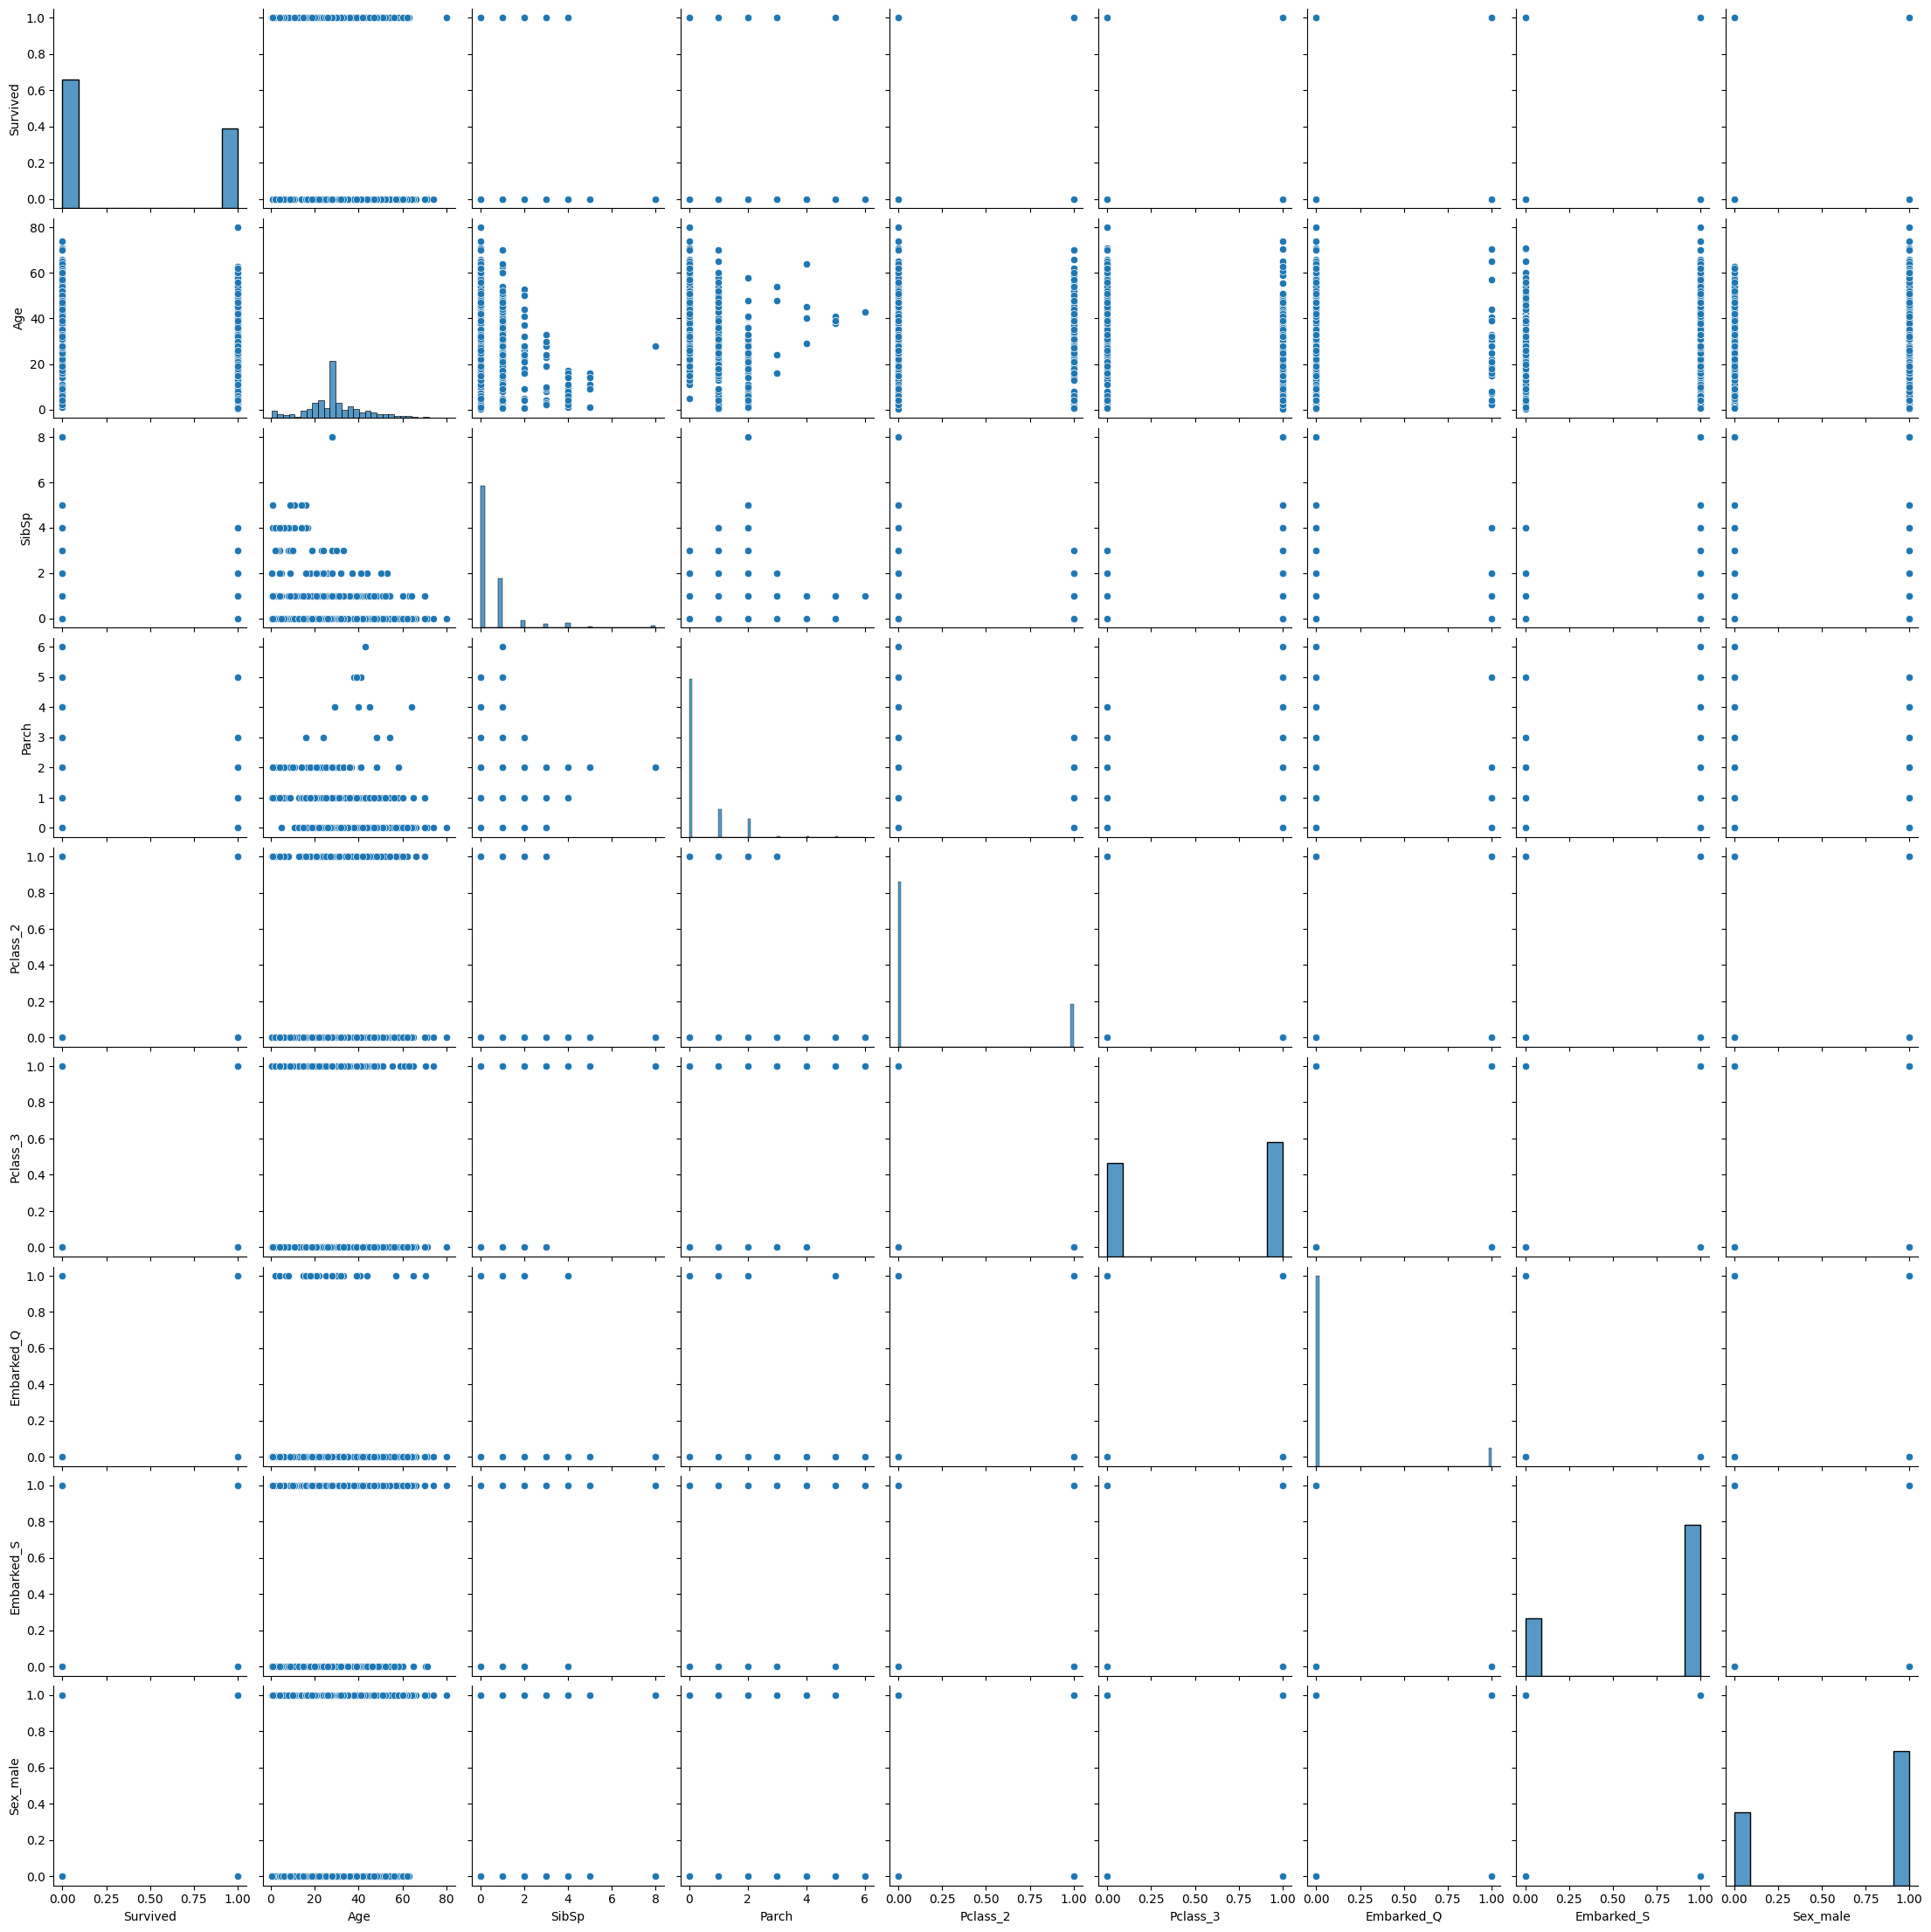

In [ ]:
sns.pairplot(train)

In [ ]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

# Split the data into training and test
# Training for building a model and test for predicting the model performance

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=10)

In [ ]:
x_test

,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
590,35.0,0,0,0,1,0,1,1
131,20.0,0,0,0,1,0,1,1
628,26.0,0,0,0,1,0,1,1
195,58.0,0,0,0,0,0,0,0
230,35.0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
456,65.0,0,0,0,0,0,1,1
191,19.0,0,0,1,0,0,1,1
603,44.0,0,0,0,1,0,1,1
94,59.0,0,0,0,1,0,1,1


In [ ]:
y_test.head(4)

590    0.0
131    0.0
628    0.0
195    1.0
Name: Survived, dtype: float64

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


Model Buildong Logistic Reg

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train , y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# predict result
model.fit(x_train , y_train)
y_pread_train = model.predict(x_train)
y_pred_test = model.predict(x_test)


In [ ]:
y_test.head(3)

590    0.0
131    0.0
628    0.0
Name: Survived, dtype: float64

In [ ]:
y_pred_test

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1.])

# Evaluate the model result

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print("Confusion Matrix")
confusion_matrix(y_test, y_pred_test)

Confusion Matrix


array([[102,  15],
       [ 17,  45]])

In [ ]:
print("Confusion Matrix")
c = confusion_matrix(y_test, y_pred_test)
print(c)
print('\n')
print("classification_report")
d = classification_report(y_test, y_pred_test)
print(d)
print('\n')
print("Training Accuracy", accuracy_score(y_train, y_pread_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

Confusion Matrix
[[102  15]
 [ 17  45]]


classification_report
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86       117
         1.0       0.75      0.73      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



Training Accuracy 0.8103932584269663
********************************************************************************
Test Accuracy 0.8212290502793296
